In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
d = pd.read_csv('Covert_new.csv')
d.head()

,ASCII Code,Binary Signal
0,64428,1
1,32714,0
2,75036,1
3,16234,0
4,76468,0


In [3]:
d.shape

(5000, 2)

In [4]:
d.isna().sum() 

ASCII Code       0
Binary Signal    0
dtype: int64

In [14]:
d['Binary Signal'].value_counts()

Binary Signal
0    4000
1    1000
Name: count, dtype: int64

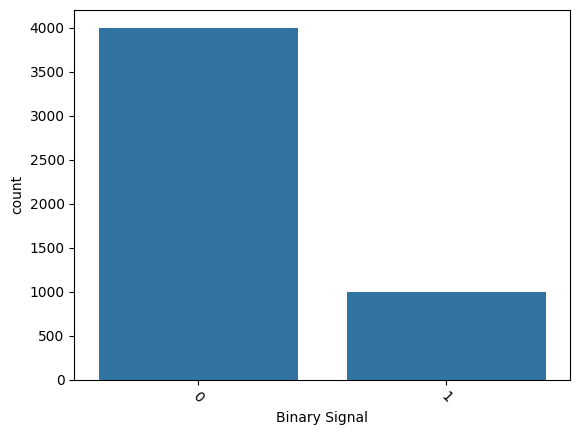

In [20]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Binary Signal', data=d)
 
# Rotate x-labels
plt.xticks(rotation=-45)
plt.show()

In [23]:
# !pip install imblearn

In [22]:
from imblearn.under_sampling import RandomUnderSampler 

In [28]:
USdf = d.copy()
X1 = USdf.drop("Binary Signal",axis=1)
Y1 = USdf['Binary Signal']
print(X1.shape,Y1.shape)

(5000, 1) (5000,)


In [29]:
nm = RandomUnderSampler() # NearMiss()
X1_res,Y1_res = nm.fit_resample(X1,Y1)
print(X1_res.shape, Y1_res.shape)

(2000, 1) (2000,)


In [30]:
UnderSampling = pd.DataFrame(columns=['data','label'])
UnderSampling['data'] = X1_res
UnderSampling['label'] = Y1_res
UnderSampling.shape

(2000, 2)

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
OSdf = d.copy()
X1 = OSdf.drop("Binary Signal",axis=1)
Y1 = OSdf['Binary Signal']
print(X1.shape,Y1.shape)

(5000, 1) (5000,)


In [35]:
oversample = SMOTE()
X1_res,Y1_res = oversample.fit_resample(X1,Y1)
print(X1_res.shape, Y1_res.shape)

(8000, 1) (8000,)


In [36]:
OverSampling = pd.DataFrame(columns=['data','label'])
OverSampling['data'] = X1_res
OverSampling['label'] = Y1_res
OverSampling.shape

(8000, 2)

In [37]:
from pycaret.classification import *

In [38]:
originaldata = setup(data = UnderSampling, target = 'label')

,Description,Value
0,Session id,1348
1,Target,label
2,Target type,Binary
3,Original data shape,"(2000, 2)"
4,Transformed data shape,"(2000, 2)"
5,Transformed train set shape,"(1400, 2)"
6,Transformed test set shape,"(600, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [39]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5300,0.5219,0.5557,0.5291,0.5411,0.0600,0.0602,0.1180
lr,Logistic Regression,0.5150,0.5202,0.5186,0.5141,0.5158,0.0300,0.0301,0.6190
ridge,Ridge Classifier,0.5150,0.5202,0.5186,0.5141,0.5158,0.0300,0.0301,0.0260
lda,Linear Discriminant Analysis,0.5150,0.5202,0.5186,0.5141,0.5158,0.0300,0.0301,0.0260
nb,Naive Bayes,0.5114,0.5202,0.5271,0.5102,0.5167,0.0229,0.0232,0.0180
qda,Quadratic Discriminant Analysis,0.5114,0.5202,0.5271,0.5102,0.5167,0.0229,0.0232,0.0270
svm,SVM - Linear Kernel,0.5000,0.4829,0.3000,0.1500,0.2000,0.0000,0.0000,0.0290
dummy,Dummy Classifier,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0230
gbc,Gradient Boosting Classifier,0.4957,0.4957,0.5071,0.4961,0.5000,-0.0086,-0.0085,0.1510
dt,Decision Tree Classifier,0.4886,0.4875,0.4943,0.4877,0.4901,-0.0229,-0.0229,0.0200


In [40]:
originaldata = setup(data = OverSampling, target = 'label')

,Description,Value
0,Session id,7347
1,Target,label
2,Target type,Binary
3,Original data shape,"(8000, 2)"
4,Transformed data shape,"(8000, 2)"
5,Transformed train set shape,"(5600, 2)"
6,Transformed test set shape,"(2400, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [41]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5968,0.6407,0.6343,0.5901,0.6112,0.1936,0.1942,0.0970
et,Extra Trees Classifier,0.5968,0.6221,0.5986,0.5965,0.5974,0.1936,0.1937,0.3980
rf,Random Forest Classifier,0.5954,0.6428,0.6000,0.5945,0.5971,0.1907,0.1908,0.8750
dt,Decision Tree Classifier,0.5936,0.5966,0.5879,0.5946,0.5910,0.1871,0.1872,0.0400
gbc,Gradient Boosting Classifier,0.5711,0.6044,0.5704,0.5713,0.5704,0.1421,0.1424,0.3320
lightgbm,Light Gradient Boosting Machine,0.5652,0.5935,0.5593,0.5661,0.5623,0.1304,0.1305,0.1860
ada,Ada Boost Classifier,0.5373,0.5480,0.5232,0.5391,0.5294,0.0746,0.0751,0.1700
nb,Naive Bayes,0.5009,0.5024,0.6125,0.5007,0.5502,0.0018,0.0018,0.0260
qda,Quadratic Discriminant Analysis,0.5009,0.5024,0.6125,0.5007,0.5502,0.0018,0.0018,0.0270
svm,SVM - Linear Kernel,0.5000,0.5006,0.4000,0.2000,0.2667,0.0000,0.0000,0.0510
